<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22701 entries, 0 to 22700
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_name         22701 non-null  object 
 1   tpep_pickup_datetime   22701 non-null  object 
 2   tpep_dropoff_datetime  22701 non-null  object 
 3   payment_method         22701 non-null  object 
 4   passenger_count        22701 non-null  int64  
 5   trip_distance          22701 non-null  float64
 6   fare_amount            22698 non-null  float64
 7   tip_amount             22701 non-null  float64
 8   tolls_amount           22701 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.6+ MB
🔍 결측치 개수:
 passenger_name           0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
payment_method           0
passenger_count          0
trip_distance            0
fare_amount              3
tip_amount               0
tolls_amount             0
dtyp

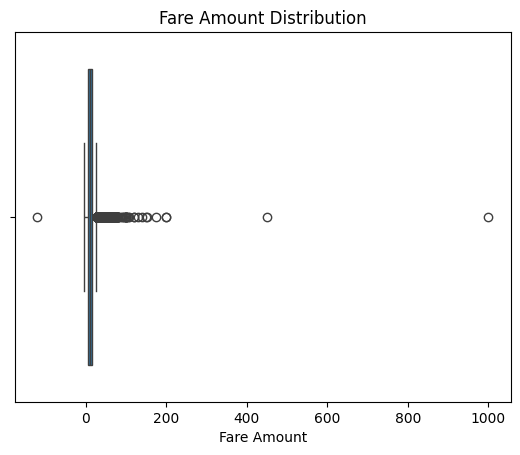

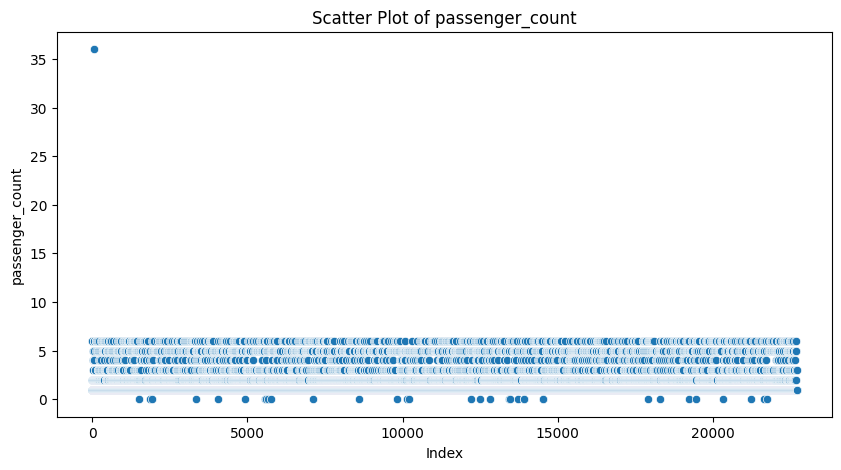

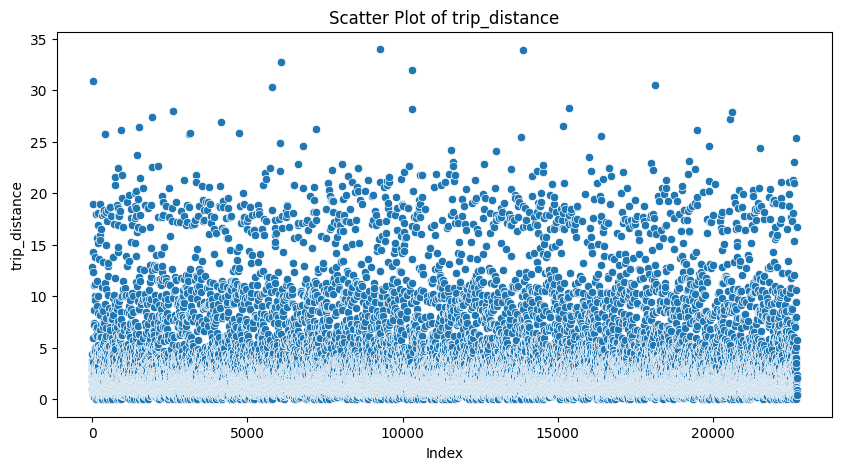

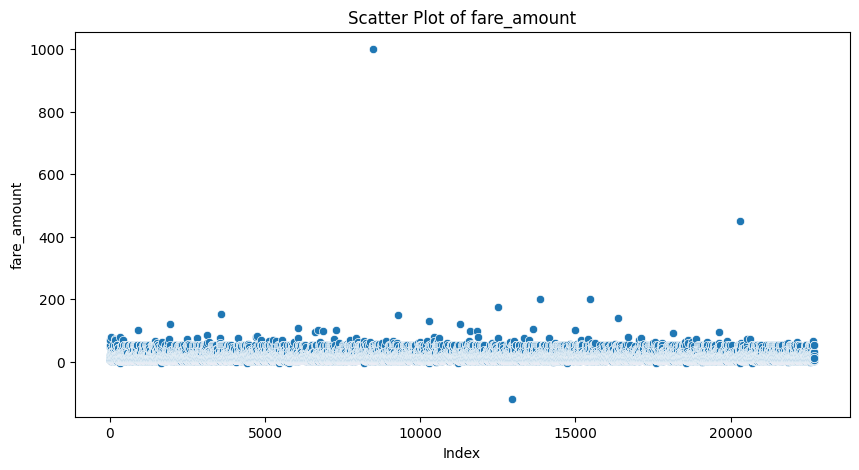

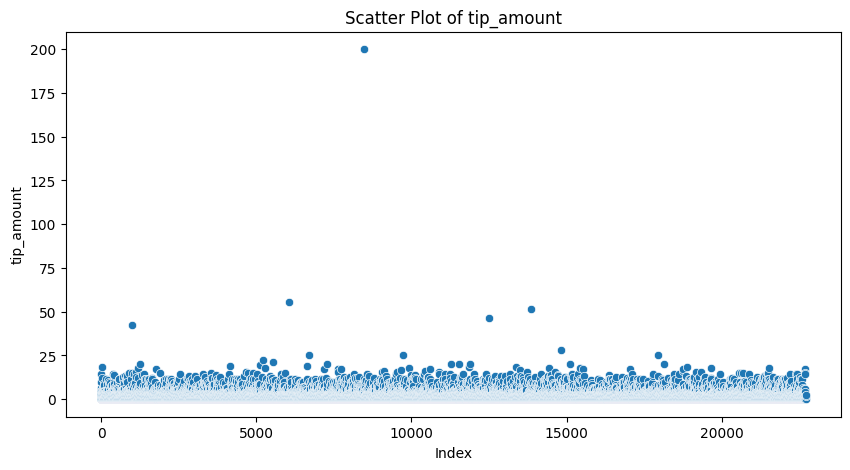

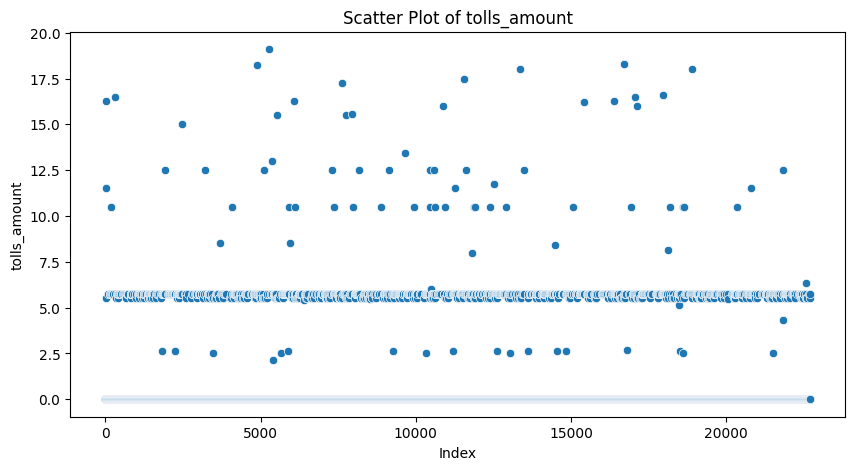

✅ 'passenger_count'에서 2291개의 이상치를 제거했습니다.
✅ 'trip_distance'에서 2265개의 이상치를 제거했습니다.
✅ 'fare_amount'에서 422개의 이상치를 제거했습니다.
✅ 'tip_amount'에서 87개의 이상치를 제거했습니다.
✅ 'tolls_amount'에서 31개의 이상치를 제거했습니다.
📌 최종 데이터 정보:
<class 'pandas.core.frame.DataFrame'>
Index: 17605 entries, 1 to 22700
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_name         17605 non-null  object 
 1   tpep_pickup_datetime   17605 non-null  object 
 2   tpep_dropoff_datetime  17605 non-null  object 
 3   payment_method         17605 non-null  object 
 4   passenger_count        17605 non-null  int64  
 5   trip_distance          17605 non-null  float64
 6   fare_amount            17605 non-null  float64
 7   tip_amount             17605 non-null  float64
 8   tolls_amount           17605 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.3+ MB
None


/var/folders/8h/bsww36j13s5f7h8gxmf9w1n00000gn/T/ipykernel_97587/119881434.py:72: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])
/var/folders/8h/bsww36j13s5f7h8gxmf9w1n00000gn/T/ipykernel_97587/119881434.py:73: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'])


               trip_duration  trip_distance  fare_amount
trip_duration       1.000000       0.098162     0.132372
trip_distance       0.098162       1.000000     0.882943
fare_amount         0.132372       0.882943     1.000000


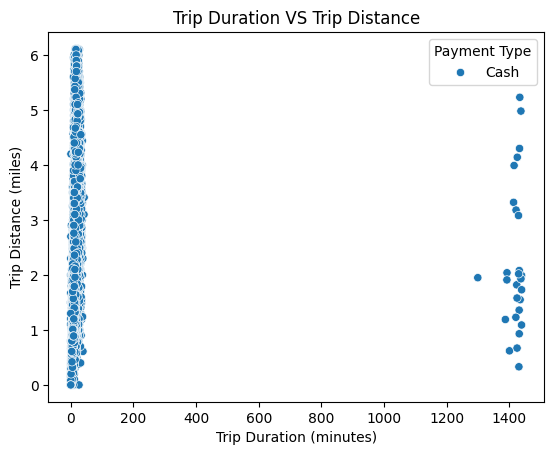

In [51]:
import pandas as pd
import seaborn as sns 
import numpy as np 
import matplotlib.pyplot as plt

# CSV 불러오기
data = pd.read_csv('/Users/jihyunmoon/Desktop/py/모두연/Pandas/day3/day4/trip.csv')

# 데이터 요약
data.info()

# 결측치 확인
print("🔍 결측치 개수:\n", data.isnull().sum())

# 결측치 비율
missing_percentage = data.isnull().mean() * 100
print("📊 결측치 비율:\n", missing_percentage)

# fare_amount가 있으면 평균으로 채우기
if 'fare_amount' in data.columns:
    data['fare_amount'] = data['fare_amount'].fillna(data['fare_amount'].median())
    print("✅ fare_amount 결측치를 평균으로 대체했습니다.")
else:
    print("❌ 'fare_amount' 컬럼이 없습니다.")

# 이상치 제거 함수 정의
def remove_outliers_iqr(data, column):
    if column not in data.columns:
        print(f"⚠️ {column} 컬럼이 없습니다.")
        return data

    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    original_len = len(data)
    filtered_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    print(f"✅ '{column}'에서 {original_len - len(filtered_data)}개의 이상치를 제거했습니다.")
    return filtered_data

# 시각화: 박스플롯
if 'fare_amount' in data.columns:
    sns.boxplot(x='fare_amount', data=data)
    plt.title('Fare Amount Distribution')
    plt.xlabel('Fare Amount')
    plt.show()

# 이상치 시각화: Scatter plot
numeric_columns = ['passenger_count', 'trip_distance', 'fare_amount', 'tip_amount', 'tolls_amount']
for column in numeric_columns:
    if column in data.columns:
        plt.figure(figsize=(10, 5))
        sns.scatterplot(x=data.index, y=data[column])
        plt.title(f'Scatter Plot of {column}')
        plt.xlabel('Index')
        plt.ylabel(column)
        plt.show()

# 이상치 제거 적용
for col in numeric_columns:
    if col in data.columns:
        data = remove_outliers_iqr(data, col)

# 최종 확인
print("📌 최종 데이터 정보:")
print(data.info())

# 주행 시간을 계산한다. 
# 날짜형으로 변환
data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])
data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'])

# 주행 시간 계산 (단위: 분)
data['trip_duration'] = (data['tpep_dropoff_datetime'] - data['tpep_pickup_datetime']).dt.total_seconds() / 60

card_types = ['Credit card', 'Debit card']
data['Payment_simplified'] = data['payment_method'].apply(lambda x: 'Card' if x in card_types else 'Cash')

print(data[['trip_duration', 'trip_distance', 'fare_amount']].corr())
sns.scatterplot(data=data, x='trip_duration', y='trip_distance', hue='Payment_simplified')
plt.title('Trip Duration VS Trip Distance')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Trip Distance (miles)')
plt.legend(title='Payment Type')
plt.show()